In [160]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import textblob
import nltk

In [111]:
dataframes = {}
for file in listdir('.'):
    if file.endswith('.csv'):
        dataframes[file[:-4]] = pd.read_csv(file)
        print(file[:-4])

packages
analytics_country_data
packages_undeployed
analytics_daily_users
analytics_daily_pageviews


/Users/t.k/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [144]:
dataframes['packages'].head(5)

,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,clicks,first_place,winner
0,2014-11-20,2014-11-17,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Anyone who's ever felt guilty about shopping a...,NaN,3052,150,True,True
1,2014-11-20,2014-11-17,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Walmart is getting schooled by another retaile...,NaN,3033,122,False,False
2,2014-11-20,2014-11-17,546d88fb84ad38b2ce000024,They're Being Called 'Walmart's Worst Nightmar...,546d6fa19ad54eec8d00002d,Things that matter. Pass 'em on.,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,Walmart may not be crapping their pants over t...,NaN,3092,110,False,False
3,2014-11-20,2014-11-17,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546bc55335992b86c8000043,Things that matter. Pass 'em on.,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,"If you ever wondered, ""but what about the men?...",NaN,3526,90,False,False
4,2014-11-20,2014-11-17,546d902c26714c6c44000039,This Is What Sexism Against Men Sounds Like,546d900426714cd2dd00002e,Things that matter. Pass 'em on.,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,"If you ever wondered, ""but what about the men?...",NaN,3506,120,True,False


In [112]:
dataframes['analytics_country_data'].head(5)

,country,users,new_users,sessions,bounce_rate,pages_per_session,session_duration
0,United States,"434,944,680","427,058,422","1,202,850,944",59.86%,1.32,0:02:35
1,Canada,"58,957,484","56,514,054","160,809,556",58.49%,1.31,0:02:53
2,United Kingdom,"46,435,791","44,456,259","103,884,722",61.56%,1.35,0:02:25
3,Australia,"23,587,951","22,614,120","58,504,210",61.07%,1.39,0:02:51
4,Germany,"7,542,762","7,057,617","16,473,675",55.65%,1.38,0:03:13


In [113]:
dataframes['analytics_daily_users'].head(5)

,date,users,new_users,sessions_per_user,sessions,session_duration,bounce_rate,pageviews,pages_per_session
0,2013-01-01,"67,283","17,706",1.05,"68,825",0:01:46,80.00%,"82,590",1.15
1,2013-01-02,"123,942","53,118",1.03,NaN,0:01:25,72.22%,NaN,1.44
2,2013-01-03,"194,766","88,530",1.13,NaN,0:01:05,77.42%,NaN,1.31
3,2013-01-04,"237,261","123,942",1.09,NaN,0:02:09,87.67%,NaN,1.15
4,2013-01-05,"134,566","60,200",1.13,NaN,0:01:35,76.74%,NaN,1.26


In [114]:
dataframes['analytics_daily_pageviews'].head(5)

,date,pageviews
0,2013-01-01,"92,812"
1,2013-01-02,"182,645"
2,2013-01-03,"286,954"
3,2013-01-04,"331,373"
4,2013-01-05,"194,671"


In [115]:
monthly_views = dataframes['analytics_daily_pageviews']

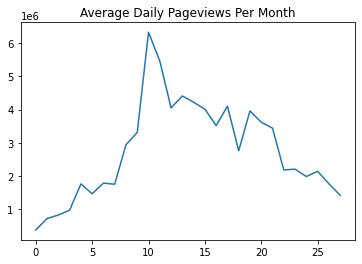

In [116]:
# daily average pageviews per month
def remove_day(date):
    parsed = date.split("-")
    return parsed[0] + "-" + parsed[1]

def str_to_int(str_view):
    return int(str_view.replace(",", ""))

monthly_views["month"] = monthly_views["date"].apply(remove_day)
monthly_views["int_views"] = monthly_views["pageviews"].apply(str_to_int)
monthly_pageviews = monthly_views.drop("date", axis=1)
monthly = monthly_pageviews.groupby("month").mean()

plt.plot(np.arange(len(monthly["int_views"])), monthly["int_views"])
plt.title("Average Daily Pageviews Per Month")
plt.show()

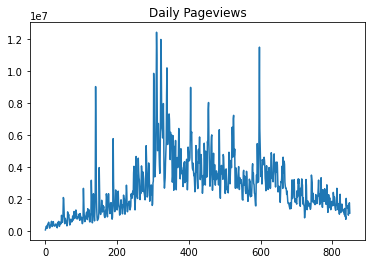

In [131]:
plt.plot(np.arange(len(monthly_views["int_views"])), monthly_views["int_views"])
plt.title("Daily Pageviews")
plt.show()

In [135]:
# maximum pageviews
sorted_views = monthly_views.sort_values("int_views", ascending=False)
sorted_views

,date,pageviews,month,int_views
310,2013-11-07,"12,453,556",2013-11,12453556
322,2013-11-19,"12,002,291",2013-11,12002291
597,2014-08-21,"11,521,430",2014-08,11521430
323,2013-11-20,"11,255,859",2013-11,11255859
311,2013-11-08,"10,837,856",2013-11,10837856
...,...,...,...,...
12,2013-01-13,"204,052",2013-01,204052
5,2013-01-06,"197,954",2013-01,197954
4,2013-01-05,"194,671",2013-01,194671
1,2013-01-02,"182,645",2013-01,182645


In [158]:
# find the articles on ten days with most pageviews
max_ten_dates = sorted_views["date"][:10]
maxview_packages = dataframes["packages"][dataframes["packages"]["created_at"] == max_ten_dates.iloc[0]]
for date in max_ten_dates.iloc[1:]:
    maxview_packages = pd.concat([maxview_packages, dataframes["packages"][dataframes["packages"]["created_at"] == date]])
maxview_packages.head(5)

,created_at,test_week,test_id,headline,image_id,excerpt,lede,slug,share_text,share_image,impressions,clicks,first_place,winner
2874,2013-11-07,2013-11-04,527b3adf74b0c5609300b553,A 4-Year-Old Girl Asked A Lesbian If She Was A...,5332c1ad1fae79f09f00ee04,It involves pajamas and pancakes.,Ash Beckham is awesome. Listen to her talk abo...,a-4-year-old-girl-asked-a-lesbian-if-she-was-a...,NaN,Screenshot_11_6_13__5_02_PM.jpg,4436,185,False,False
10458,2013-11-07,2013-11-04,527b122c74b0c5bafb007104,A 4-Year-Old Girl Asked A Lesbian If She Was A...,5332c1ad1fae79f09f00ee04,Listen to her talk about straight people comin...,Ash Beckham is awesome. Listen to her talk abo...,a-5-year-old-girl-asked-a-lesbian-if-she-was-a...,NaN,Screenshot_11_6_13__5_02_PM.jpg,8880,331,False,False
10485,2013-11-07,2013-11-04,527b122c74b0c5bafb007104,A 4-Year-Old Girl Asked A Lesbian If She Was A...,5332c1ad1fae79f09f00ee04,Coming out of the closet is hard. Even for str...,Ash Beckham is awesome. Listen to her talk abo...,a-5-year-old-girl-asked-a-lesbian-if-she-was-a...,NaN,Screenshot_11_6_13__5_02_PM.jpg,7889,306,False,False
10490,2013-11-07,2013-11-04,527b2d2274b0c5800800a844,A 4-Year-Old Girl Asked This Woman If She Was ...,5332c1ad1fae79f09f00ee04,It involves pajamas and pancakes.,Ash Beckham is awesome. Listen to her talk abo...,a-4-year-old-girl-asked-this-woman-if-she-was-...,NaN,Screenshot_11_6_13__5_02_PM.jpg,5818,191,False,False
10499,2013-11-07,2013-11-04,527b2d2274b0c5800800a844,A 4-Year-Old Girl Asked A Lesbian If She Was A...,5332c1ad1fae79f09f00ee04,It involves pajamas and pancakes.,Ash Beckham is awesome. Listen to her talk abo...,a-4-year-old-girl-asked-a-lesbian-if-she-was-a...,NaN,Screenshot_11_6_13__5_02_PM.jpg,6607,233,False,False
